In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/train'
valid_path = 'Dataset/test'

In [5]:

# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [6]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [7]:
# useful for getting number of output classes
folders = glob('Dataset/train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1512 images belonging to 5 classes.


In [14]:
test_set = test_datagen.flow_from_directory('Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 500 images belonging to 5 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

E:\snehanshu\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
48/48 [==============================] - 119s 2s/step - loss: 4.3241 - accuracy: 0.2679 - val_loss: 1.9385 - val_accuracy: 0.2840
Epoch 2/10
48/48 [==============================] - 118s 2s/step - loss: 1.6614 - accuracy: 0.3565 - val_loss: 1.4787 - val_accuracy: 0.3880
Epoch 3/10
48/48 [==============================] - 114s 2s/step - loss: 1.6160 - accuracy: 0.3644 - val_loss: 2.4253 - val_accuracy: 0.3080
Epoch 4/10
48/48 [==============================] - 121s 3s/step - loss: 1.6511 - accuracy: 0.3790 - val_loss: 1.5589 - val_accuracy: 0.4300
Epoch 5/10
48/48 [==============================] - 122s 3s/step - loss: 1.7057 - accuracy: 0.3790 - val_loss: 1.5347 - val_accuracy: 0.4700
Epoch 6/10
48/48 [==============================] - 123s 3s/step - loss: 1.5750 - accuracy: 0.3889 - val_loss: 1.3615 - val_accuracy: 0.4960
Epoch 7/10
48/48 [==============================] - 121s 3s/step - loss: 1.4339 - accuracy: 0.4517 - val_loss: 1.4388 - val_accuracy: 0.4560
Epoch 8/10
48

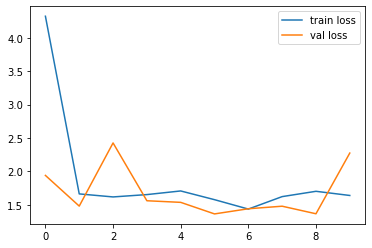

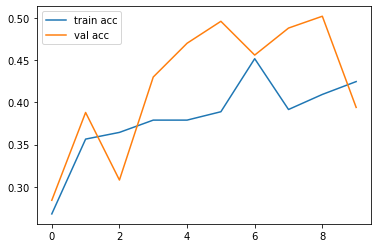

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model1_resnet50.h5')

In [19]:
y_pred = model.predict(test_set)

In [20]:

y_pred

array([[5.9469742e-01, 5.6636720e-03, 2.8504478e-02, 1.2917286e-01,
        2.4196157e-01],
       [7.5082499e-01, 2.0190168e-03, 2.2953223e-03, 1.9139199e-01,
        5.3468633e-02],
       [8.1683046e-01, 4.2063129e-04, 7.2362641e-04, 1.6870803e-01,
        1.3317367e-02],
       ...,
       [8.0005908e-01, 3.9032614e-03, 2.1913540e-02, 5.4610591e-02,
        1.1951358e-01],
       [6.7997503e-01, 2.6589709e-03, 1.3391378e-03, 7.9635732e-02,
        2.3639117e-01],
       [4.2396369e-03, 8.2723588e-08, 4.4041185e-06, 9.9575102e-01,
        4.7285357e-06]], dtype=float32)

In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [22]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 4, 0, 4, 0, 0, 3, 0, 3,
       3, 0, 0, 4, 0, 4, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 4, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 3, 0, 3, 0, 0, 0, 2, 0,
       0, 4, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3, 2, 2, 0, 3, 0, 0, 3, 0, 4, 0,
       0, 4, 0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 4, 0, 0, 3, 0, 3, 3, 3, 4, 0,
       0, 0, 0, 0, 3, 3, 0, 2, 0, 3, 0, 0, 0, 4, 0, 0, 4, 0, 3, 3, 3, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 3, 4, 0, 0, 0, 0, 3, 0, 4, 0, 0, 3, 0, 0,
       3, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 4, 4, 0, 3, 0, 0, 0, 0, 0, 3,
       2, 0, 3, 0, 4, 3, 0, 3, 0, 2, 0, 3, 0, 0, 4, 0, 0, 0, 0, 3, 3, 3,
       3, 0, 0, 0, 0, 3, 2, 0, 0, 0, 4, 2, 3, 0, 4, 0, 0, 3, 0, 0, 0, 0,
       0, 4, 3, 4, 0, 3, 0, 3, 2, 4, 2, 0, 0, 3, 0, 0, 4, 4, 0, 0, 4, 0,
       3, 3, 4, 4, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 4, 0,
       3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 4, 0, 3, 0, 3, 3, 0, 3, 3,
       0, 0, 0, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4,

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [24]:
model=load_model('model1_resnet50.h5')

In [26]:
img=image.load_img('Dataset/Test/paper/paper11.jpg',target_size=(224,224))

In [27]:

x=image.img_to_array(img)
x

array([[[237., 243., 255.],
        [236., 242., 255.],
        [235., 241., 255.],
        ...,
        [173., 173., 173.],
        [171., 171., 171.],
        [169., 169., 169.]],

       [[236., 242., 255.],
        [236., 242., 255.],
        [235., 241., 255.],
        ...,
        [173., 173., 173.],
        [171., 171., 171.],
        [169., 169., 169.]],

       [[236., 242., 255.],
        [235., 241., 255.],
        [234., 240., 254.],
        ...,
        [173., 173., 173.],
        [171., 171., 171.],
        [169., 169., 169.]],

       ...,

       [[198., 145.,  67.],
        [208., 152.,  75.],
        [204., 147.,  70.],
        ...,
        [160., 161., 165.],
        [159., 160., 164.],
        [158., 159., 163.]],

       [[160., 121.,  66.],
        [190., 145.,  88.],
        [200., 148.,  88.],
        ...,
        [160., 161., 165.],
        [159., 160., 164.],
        [158., 159., 163.]],

       [[120.,  90.,  54.],
        [105.,  70.,  30.],
        [124.,  

In [28]:
x.shape

(224, 224, 3)

In [29]:

x=x/255

In [30]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [31]:
model.predict(img_data)

array([[9.9497390e-01, 6.3540939e-10, 5.1068782e-04, 4.5153568e-03,
        4.2287776e-17]], dtype=float32)

In [32]:

a=np.argmax(model.predict(img_data), axis=1)

In [36]:
a==0


array([ True])